# Capstone Project: Consumer Insights Data Analytics Externship of Beats by Dre

## 1. Title Page
**Project Title:** Consumer Insights Data Analytics Externship of Beats by Dre  
**Student Name:** Pearl De Mello

**Date:** August 31, 2024

## 2. Table of Contents
1. Introduction
2. Data Description
3. Exploratory Data Analysis (EDA)
4. Sentiment Analysis
5. AI-Generated Insights
6. Comparative Analysis
7. Strategic Recommendations
8. Conclusion
9. References

## 3. Introduction

### 3.1 Project Overview

The goal is to explore how consumer feedback impacts product strategy and brand perception for Beats by Dre and other popular headphone brands on Amazon. By analyzing a range of customer reviews, this project aims to uncover insights that can guide future business decisions.

The project will:

1. Perform exploratory data analysis (EDA) to identify trends and patterns in the data.
2. Use sentiment analysis to gauge customer opinions and summarize the overall sentiment.
3. Leverage Gemini AI to generate additional insights that can inform business strategies.

I will conduct several key analyses, including:

* How customer sentiment influences product development and marketing strategies.
* The role of specific product features in shaping consumer opinions.
* The impact of brand reputation on customer loyalty and overall satisfaction.

Finally, I'll provide a set of recommendations based on our findings, helping the brand leverage customer feedback to strengthen its market position.

### 3.2 Background

Beats by Dre, founded in 2006 by Dr. Dre and Jimmy Iovine, is a leading brand in the audio technology industry renowned for its high-quality headphones and sleek, modern design. Unlike conventional high-end headphones, Beats differentiates itself by focusing on the emotional resonance of sound, recreating the feeling of being in the studio as Iovine stated,

> "We wanted to recreate that excitement of being in the studio. That's why people listen."

 The brand’s unique focus on delivering an engaging listening experience has resonated with music lovers worldwide. In July 2014, Beats' innovative approach and strong market presence led to its acquisition by Apple Inc.




## 4. Data Description

### 4.1 Data Sources

For this project, I gathered consumer reviews from Amazon to analyze customer sentiment and insights regarding Beats by Dre and its competitors in the audio technology market. The data collection process involved selecting ten products, including one Beats product and nine from competing brands such as Bose, Sony, JBL, and Sennheiser. Before selecting the products for this analysis, I attended a company meeting where research findings on consumer trends in audio devices were discussed. It was highlighted that most participants prefer using audio devices such as headphones and earbuds over speakers, with wireless and portable options being the most popular due to their flexible usage. Based on these insights, I chose to focus on wireless headphones for this analysis. The focus was on obtaining a substantial number of reviews, with each product having around 100 reviews.

### 4.2 Data Collection


The reviews were extracted using the Oxylabs API, which simplifies the process of scraping data from Amazon. Oxylabs offers a free trial period, during which I was able to extract up to 100 reviews per product for a comprehensive dataset of approximately 1,000 reviews in total.

During the data collection process, I encountered challenges with the Oxylabs API, particularly when scraping reviews from Amazon. For some products, the API did not return the desired 100 reviews, often providing only a limited number of reviews. This issue was primarily due to Amazon's limitations on scraping which restricted the amount of data that could be retrieved.

To overcome this challenge, I adapted my approach by selecting additional and alternative products within the same category to ensure I could reach my target of approximately 1,000 reviews in total. By expanding product selection and carefully managing the API requests, I was able to compile a sufficient dataset for my data analysis.

### 4.3 Data Cleaning

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import google.generativeai as genai

In [ ]:
# Load the merged dataset
df = pd.read_csv('merged_data.csv')

In [ ]:
# Preview the first 10 rows of the dataset
df.head(10)

,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes
0,R20IRE5X6WY351,B085296FLT,5.0 out of 5 stars Great headphones!,Talia Calazans,5,"I love these headphones, and I wear them all t...","Reviewed in the United States June 1, 2024",AG6TODKB7VQYDH7KJ2MKHF6RQEGA,True,7,Color: Shadow GraySet: Studio3
1,R1AGLOG6IH1XW0,B085296FLT,5.0 out of 5 stars Great quality and price,SethB,5,I got these because my old pair finally broke ...,"Reviewed in the United States July 18, 2024",AFCW3Q2AD5H4JEZUZN753EL5D6QA,True,1,Color: Shadow GraySet: Studio3
2,R1UVTRVZ4F5DME,B085296FLT,5.0 out of 5 stars LONG battery life.,Julian,5,I recently invested in the Beats Studio3 Wirel...,"Reviewed in the United States March 3, 2024",AHUVU5TLJQFQMZKFR7YKDB55USPA,True,22,Color: Midnight BlackSet: Studio3
3,RWERS59MUAMQ,B085296FLT,5.0 out of 5 stars SUPER cool!,Rich,5,"Super good audio, charges fast and has a long ...","Reviewed in the United States July 21, 2024",AEKO4ZKYO5HYOL7NTE6YSFPHCDBA,True,0,Color: WhiteSet: Studio3
4,RFGOLBEISEB55,B085296FLT,5.0 out of 5 stars Great Headphones!,Leosha Williams,5,These headphones are absolutely amazing! The v...,"Reviewed in the United States June 1, 2024",AFBT2YGFVT6CBITOKGANUEJ5WYHA,True,17,Color: Shadow GraySet: Studio3
5,R2AGD67A8P04AC,B085296FLT,"4.0 out of 5 stars Great headphones, just don'...",Jacob,4,"Jan 2023 - First, I am not an audiophile. So, ...","Reviewed in the United States January 23, 2023",AH3SC2BAKM6AA7XJMTJ4KAET6MSQ,True,93,Color: Matte BlackSet: Studio3
6,R2399XIITPW93N,B085296FLT,5.0 out of 5 stars Works great,Max Rundell,5,They are sleek and great value for the money y...,"Reviewed in the United States June 18, 2024",AGONEWJIIDADSFNMIJQESOKWVG3A,True,1,Color: Matte BlackSet: Studio3
7,R1S3QWGEJLIK7Q,B085296FLT,5.0 out of 5 stars amazing headphones,N/a,5,"great headphones, often have very significant ...","Reviewed in the United States June 21, 2024",AGVMWTJXVGQBYWLPQAHT3YPKMC2Q,True,2,Color: Matte BlackSet: Studio3
8,R1H100TYFQZJLK,B085296FLT,2.0 out of 5 stars Please Read Before Buying.,O.Winnie Mittelberger,2,My rating falls close to a 1.5 for multiple re...,"Reviewed in the United States December 29, 2022",AH46ZHN22ZKGHWOM3UMMORBATP2Q,True,928,Color: Matte BlackSet: Studio3
9,RN5R5UIZT51B,B085296FLT,5.0 out of 5 stars Great Sound Quality!,Anthony,5,"I originally wanted to get the AirPods Max, bu...","Reviewed in the United States August 2, 2024",AGKRRTECJOZGUNLJU2QJJRNRYNAA,True,0,Color: WhiteSet: Studio3


In [ ]:
# Check the column names and data types to understand the structure of the data
df.columns
df.dtypes

,0
review_id,object
product_id,object
title,object
author,object
rating,int64
content,object
timestamp,object
profile_id,object
is_verified,bool
helpful_count,int64


In [ ]:
# Identify missing values in the dataset
df.isnull().sum()

,0
review_id,0
product_id,0
title,0
author,1
rating,0
content,0
timestamp,0
profile_id,0
is_verified,0
helpful_count,0


### Handle missing values and drop columns

In [ ]:
# Replace missing values in 'product_attributes' and 'author' columns with 'Unknown'
df = df.fillna({'product_attributes': 'Unknown', 'author':'Unknown'})

In [ ]:
# Drop the review_id column since it will not be used for analysis

df.drop('review_id', axis=1, inplace=True)

### Convert the 'timestamp' column from a string to a datetime format

In [ ]:
# First, extract the date part of the timestamp string
def extract(timestamp):
  words = timestamp.split()
  date_split = words[-3:]
  date_extract = ' '.join(date_split)
  return date_extract

# Apply the extraction function and convert the 'timestamp' column to datetime
df['timestamp'] = df['timestamp'].apply(extract)
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [ ]:
df.head()

,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes
0,B085296FLT,5.0 out of 5 stars Great headphones!,Talia Calazans,5,"I love these headphones, and I wear them all t...",2024-06-01,AG6TODKB7VQYDH7KJ2MKHF6RQEGA,True,7,Color: Shadow GraySet: Studio3
1,B085296FLT,5.0 out of 5 stars Great quality and price,SethB,5,I got these because my old pair finally broke ...,2024-07-18,AFCW3Q2AD5H4JEZUZN753EL5D6QA,True,1,Color: Shadow GraySet: Studio3
2,B085296FLT,5.0 out of 5 stars LONG battery life.,Julian,5,I recently invested in the Beats Studio3 Wirel...,2024-03-03,AHUVU5TLJQFQMZKFR7YKDB55USPA,True,22,Color: Midnight BlackSet: Studio3
3,B085296FLT,5.0 out of 5 stars SUPER cool!,Rich,5,"Super good audio, charges fast and has a long ...",2024-07-21,AEKO4ZKYO5HYOL7NTE6YSFPHCDBA,True,0,Color: WhiteSet: Studio3
4,B085296FLT,5.0 out of 5 stars Great Headphones!,Leosha Williams,5,These headphones are absolutely amazing! The v...,2024-06-01,AFBT2YGFVT6CBITOKGANUEJ5WYHA,True,17,Color: Shadow GraySet: Studio3


### Convert the 'is_verified' column to a numerical format

In [ ]:
df['is_verified'] = df['is_verified'].apply(lambda x: 1 if x==True else 0)
df['is_verified'].head()

,is_verified
0,1
1,1
2,1
3,1
4,1


In [ ]:
# Ensure the column is int
df.dtypes

,0
product_id,object
title,object
author,object
rating,int64
content,object
timestamp,datetime64[ns]
profile_id,object
is_verified,int64
helpful_count,int64
product_attributes,object


In [ ]:
# Get a summary of the dataset to confirm the cleaning process
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   product_id          1000 non-null   object        
 1   title               1000 non-null   object        
 2   author              1000 non-null   object        
 3   rating              1000 non-null   int64         
 4   content             1000 non-null   object        
 5   timestamp           1000 non-null   datetime64[ns]
 6   profile_id          1000 non-null   object        
 7   is_verified         1000 non-null   int64         
 8   helpful_count       1000 non-null   int64         
 9   product_attributes  1000 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 78.2+ KB


### Clean the 'title' column by removing the "out of 5 stars" part from the string

In [ ]:
def extract(title):
  words = title.split("out of 5 stars")
  title_split = words[-1]
  title_extract = ''.join(title_split)
  return title_extract

df['title'] = df['title'].apply(extract)

# Preview the cleaned data
df.head(10)

,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes
0,B085296FLT,Great headphones!,Talia Calazans,5,"I love these headphones, and I wear them all t...",2024-06-01,AG6TODKB7VQYDH7KJ2MKHF6RQEGA,1,7,Color: Shadow GraySet: Studio3
1,B085296FLT,Great quality and price,SethB,5,I got these because my old pair finally broke ...,2024-07-18,AFCW3Q2AD5H4JEZUZN753EL5D6QA,1,1,Color: Shadow GraySet: Studio3
2,B085296FLT,LONG battery life.,Julian,5,I recently invested in the Beats Studio3 Wirel...,2024-03-03,AHUVU5TLJQFQMZKFR7YKDB55USPA,1,22,Color: Midnight BlackSet: Studio3
3,B085296FLT,SUPER cool!,Rich,5,"Super good audio, charges fast and has a long ...",2024-07-21,AEKO4ZKYO5HYOL7NTE6YSFPHCDBA,1,0,Color: WhiteSet: Studio3
4,B085296FLT,Great Headphones!,Leosha Williams,5,These headphones are absolutely amazing! The v...,2024-06-01,AFBT2YGFVT6CBITOKGANUEJ5WYHA,1,17,Color: Shadow GraySet: Studio3
5,B085296FLT,"Great headphones, just don't fit my big ears.",Jacob,4,"Jan 2023 - First, I am not an audiophile. So, ...",2023-01-23,AH3SC2BAKM6AA7XJMTJ4KAET6MSQ,1,93,Color: Matte BlackSet: Studio3
6,B085296FLT,Works great,Max Rundell,5,They are sleek and great value for the money y...,2024-06-18,AGONEWJIIDADSFNMIJQESOKWVG3A,1,1,Color: Matte BlackSet: Studio3
7,B085296FLT,amazing headphones,N/a,5,"great headphones, often have very significant ...",2024-06-21,AGVMWTJXVGQBYWLPQAHT3YPKMC2Q,1,2,Color: Matte BlackSet: Studio3
8,B085296FLT,Please Read Before Buying.,O.Winnie Mittelberger,2,My rating falls close to a 1.5 for multiple re...,2022-12-29,AH46ZHN22ZKGHWOM3UMMORBATP2Q,1,928,Color: Matte BlackSet: Studio3
9,B085296FLT,Great Sound Quality!,Anthony,5,"I originally wanted to get the AirPods Max, bu...",2024-08-02,AGKRRTECJOZGUNLJU2QJJRNRYNAA,1,0,Color: WhiteSet: Studio3


### Observations:



*   There were some missing values in the 'product_attributes' and 'author' columns, which were handled by replacing them with 'Unknown' to avoid dropping any records.
* The 'timestamp' column was initially in a string format, requiring extraction and conversion to a datetime format for time-based analysis.
* The 'is_verified' column was converted from a boolean to a numerical format to use in statistical analysis.
* The 'title' column had unnecessary text ("out of 5 stars"), which was removed to focus on the actual content of the review titles.



## 5. Exploratory Data Analysis (EDA)

### 5.1 Data Overview



### Descriptive statistics for the 'rating' column

In [ ]:
df['rating'].describe()

,rating
count,1000.000000
mean,4.438000
std,0.805484
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
# Calculate the variance of the 'rating' column to understand the variability
df['rating'].var()

0.6488048048048047

In [ ]:
# Identify the most frequently occurring rating (mode)
df['rating'].mode()[0]

5

### Descriptive statistics for the 'helpful_count' column


In [ ]:
df['helpful_count'].describe()

,helpful_count
count,1000.000000
mean,9.992000
std,66.423671
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1394.000000


In [ ]:
# Calculate the variance of the 'helpful_count' column
df['helpful_count'].var()

4412.10404004004

In [ ]:
df['helpful_count'].mode()[0]

0

### Variance of ratings for the Beats by Dre headphone

In [ ]:
beats_df = df[df['product_id'] == 'B085296FLT']
beats_df['rating'].var()

0.2096969696969696

### Identify Outliers in the 'rating' column

In [ ]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df['rating'].quantile(0.25)
Q3 = df['rating'].quantile(0.75)
IQR = Q3 - Q1 # Calculate the Interquartile Range (IQR)

# Define the lower and upper bounds for identifying outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("lower bound: ", lower_bound)
print("upper_bound: ", upper_bound)

outliers = []
for i in df['rating']:
  if i < lower_bound or i > upper_bound:
    outliers.append(i)

print("Outliers: ", sorted(outliers))

lower bound:  2.5
upper_bound:  6.5
Outliers:  [1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


### 5.2 Visualizations


### Histogram of the ratings for all the products

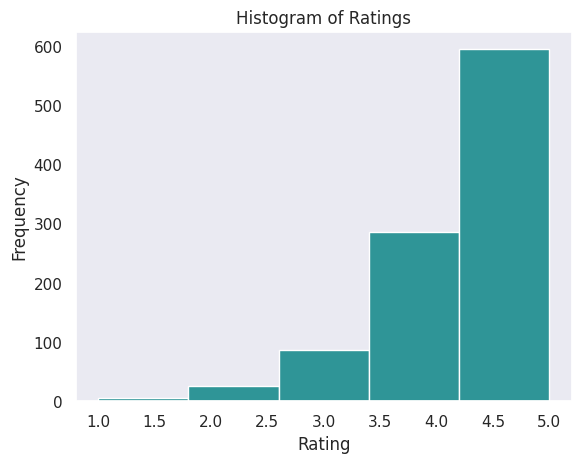

<Figure size 800x600 with 0 Axes>

In [ ]:
sns.set(style="dark")
sns.histplot(df['rating'], bins=5, color='teal', alpha=0.8)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Ratings')
plt.figure(figsize=(8,6))
plt.show()

Most ratings are clustered around 4.5 and 5.0 which suggests that majority of customers were satisfied with the products

### Boxplot of Ratings by Product

In [ ]:
# Create a new column called "product_name" and map product_id to product_name

product_map = {
    'B085296FLT' : 'Beats Studio3',
    'B09XS7JWHH' : 'Sony WH-1000XM5',
    'B08HDBZNZ9' : 'INFURTURE H1',
    'B0CGTL9GFD' : 'Edifier WH700NB',
    'B095BV8R27' : 'MOVSSOU E7',
    'B08WR6YDKP' : 'JBL Live 460NC',
    'B083W7V3RG' : 'SENNHEISER HD 450BT',
    'B0CQXMXJC5' : 'soundcore by Anker Q20i',
    'B0CCZ1SQ8G' : 'Bose QuietComfort',
    'B0BKPRTRXK' : 'RUNOLIM'
}

df['product_name'] = df['product_id'].map(product_map)

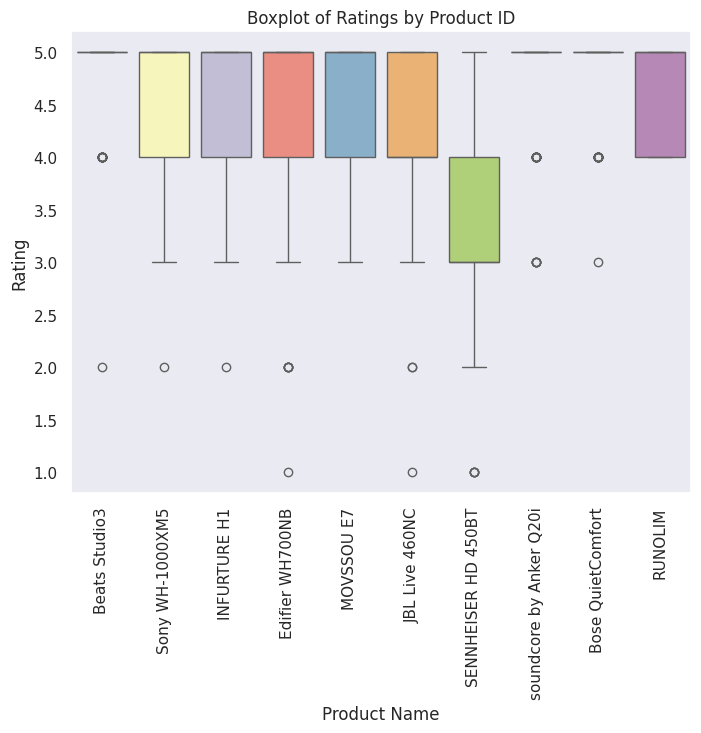

In [ ]:
sns.set(style='dark')
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x = 'product_name', y = 'rating', hue = 'product_name', palette='Set3')
plt.title('Boxplot of Ratings by Product ID')
plt.xlabel('Product Name')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()


* The Beats Studio3 boxplot is quite narrow and centered around high ratings, indicating that most customers rate this product favorably with little variation in their satisfaction levels
* Unlike some other products, RUNOLIM does not have many outliers, suggesting that there are very few instances of extreme dissatisfaction

### Scatterplot between helpful count and ratings

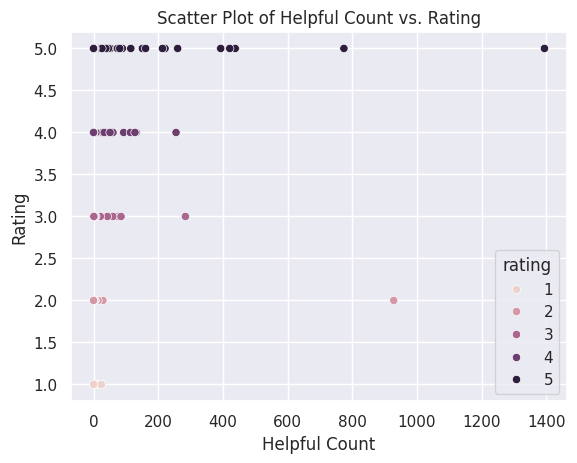

In [ ]:
sns.set(style='darkgrid')
sns.scatterplot(data=df, x='helpful_count', y='rating', hue = 'rating')
plt.title('Scatter Plot of Helpful Count vs. Rating')
plt.xlabel('Helpful Count')
plt.ylabel('Rating')
plt.show()

The plot suggests that the number of helpful votes a review receives doesn't strongly depend on the rating it gives. There are a few outliers where a review with a high helpful_count has a lower or moderate rating. This should be considered as it represents critical reviews by the consumers that could help the company improve their products.

### Heatmap of average ratings by product and time

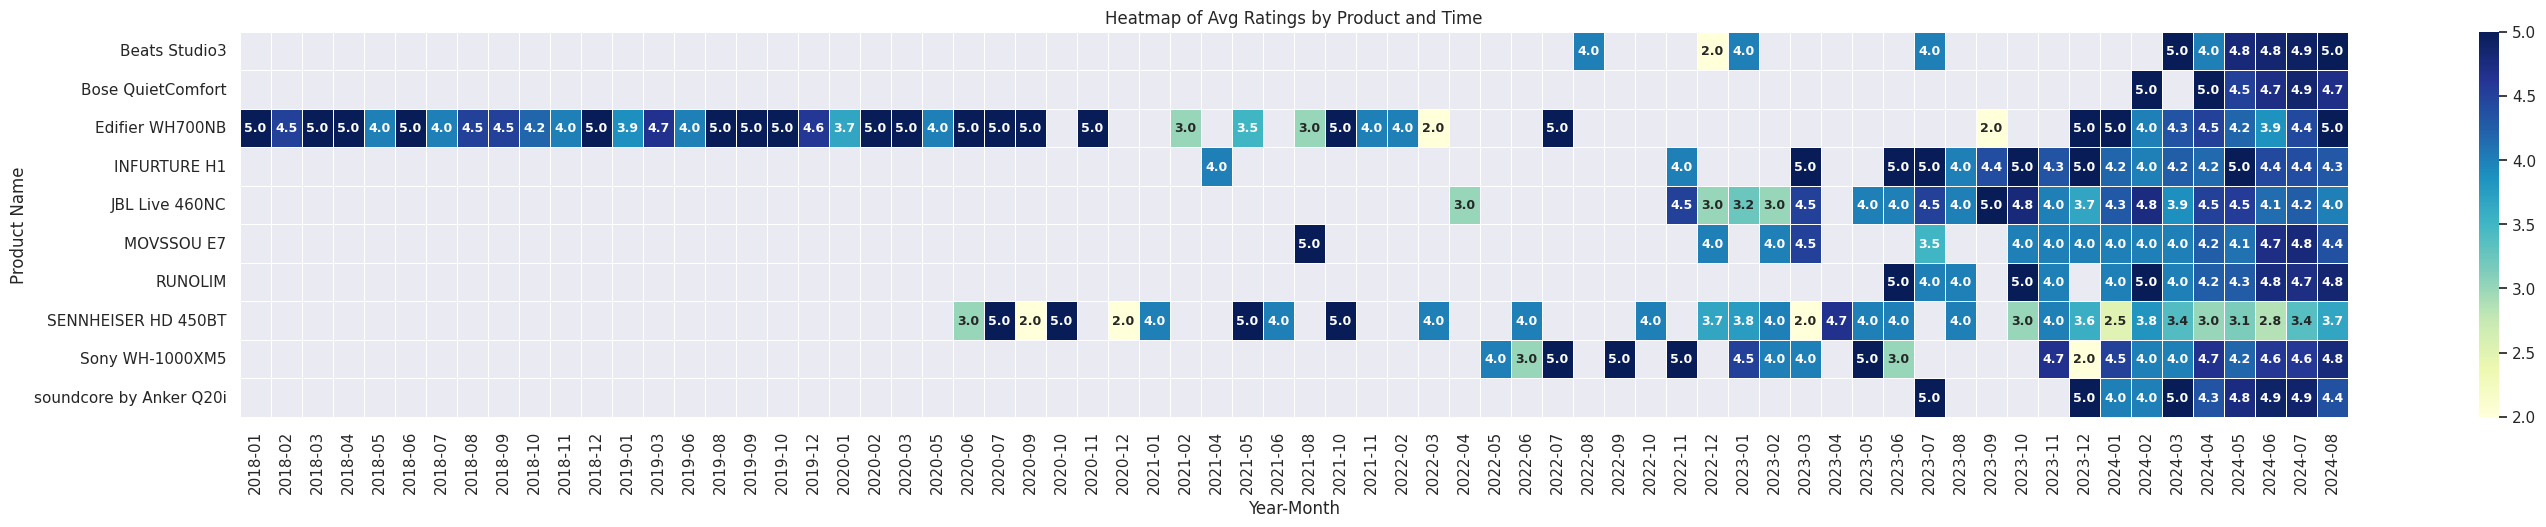

In [ ]:
df['year_month'] = df['timestamp'].dt.to_period('M')
df_pt = df.pivot_table(values='rating', index='product_name', columns='year_month', aggfunc='mean')
df.drop('year_month', axis=1, inplace=True)

rows = df_pt.shape[0]
cols = df_pt.shape[1]

plt.figure(figsize=(cols * .5, rows *.5))
sns.set(style='dark')

sns.heatmap(df_pt, annot = True, annot_kws = {"size": 9, "weight": "bold"}, cmap="YlGnBu", fmt=".1f", linewidths=.5)
plt.title('Heatmap of Avg Ratings by Product and Time')
plt.xlabel('Year-Month')
plt.ylabel('Product Name')
plt.show()

This heatmap provides a clear overview of how customer satisfaction varies over time for each product. While most products maintain high average ratings, certain products like SENNHEISER HD 450BT and JBL Live 460NC show more variability which highlights areas where customer satisfaction may need to be addressed. The data for Beats Studio3 is not as consistent or frequent as other products, but the ratings are overwhelmingly positive.

### Correlation matrix of rating and helpful_count

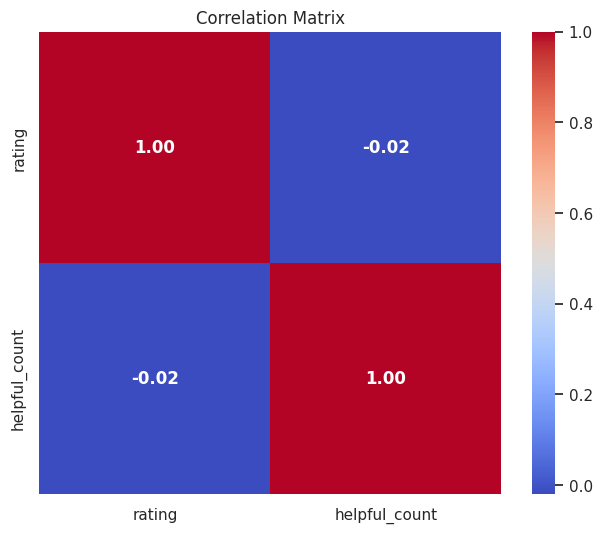

In [ ]:
df_cm = df.loc[:, ['rating', 'helpful_count']].corr()
plt.figure(figsize=(8,6))
sns.set(style='dark')
sns.heatmap(df_cm, annot = True, annot_kws = {"weight": "bold"}, fmt=".2f", cmap='coolwarm', square = True)
plt.title('Correlation Matrix')
plt.show()

There is no correlation between rating and helpful_count. This suggests that whether a review is rated highly or poorly does not significantly impact how helpful other users find it.

### 5.3 Descriptive Statistics

The variance for the ratings of the products is 0.6488 with the mean being 4.438 suggesting that while most of the consumers are likely to rate the products highly, there is some variability that indicates there are customers who experienced disatisfaction with the products. The variance for Beats by Dre is 0.2096969696969696 which is lower than the general variance suggesting better customer satisfaction. It would be helpful for Beats by Dre to investigate on the outliers from the ratings to help focus on minor improvements.

## 6. Sentiment Analysis

### 6.1 Methodology

In [ ]:
# Sentiment Analysis using TextBlob to analyze consumer sentiment for each of the 10 products

def analyze_text(text):
  blob = TextBlob(text)
  if blob.sentiment.polarity > 0:
    return 'Positive'
  elif blob.sentiment.polarity < 0:
    return 'Negative'
  else:
    return 'Neutral'

df['sentiment'] = df['content'].apply(analyze_text)

consumer_sentiments = df.groupby('product_name')['sentiment'].value_counts()

consumer_sentiments

product_name             sentiment
Beats Studio3            Positive     82
                         Neutral      15
                         Negative      3
Bose QuietComfort        Positive     99
                         Negative      1
Edifier WH700NB          Positive     93
                         Neutral       5
                         Negative      2
INFURTURE H1             Positive     93
                         Negative      5
                         Neutral       2
JBL Live 460NC           Positive     86
                         Neutral       8
                         Negative      6
MOVSSOU E7               Positive     91
                         Neutral       6
                         Negative      3
RUNOLIM                  Positive     92
                         Negative      4
                         Neutral       4
SENNHEISER HD 450BT      Positive     85
                         Negative     10
                         Neutral       5
Sony WH-1000XM5          Positive     95
                         Negative      3
                         Neutral       2
soundcore by Anker Q20i  Positive     97
                         Negative      2
                         Neutral       1
Name: count, dtype: int64

In [ ]:
# Sentiment Analysis using TextBlob for overall consumer sentiment

def analyze_text(text):
  blob = TextBlob(text)
  if blob.sentiment.polarity > 0:
    return 'Positive'
  elif blob.sentiment.polarity < 0:
    return 'Negative'
  else:
    return 'Neutral'

df['sentiment'] = df['content'].apply(analyze_text)

consumer_sentiment = df['sentiment'].value_counts()

consumer_sentiment

,count
sentiment,
Positive,913
Neutral,48
Negative,39


For this project, I used TextBlob for sentiment analysis and the overall consumer sentiment across all products, including Beats by Dre, is predominantly positive which suggests that most customers were satisfied with their purchases. For every 1 negative review, there are approximately 23 positive reviews.

### 6.2 Results


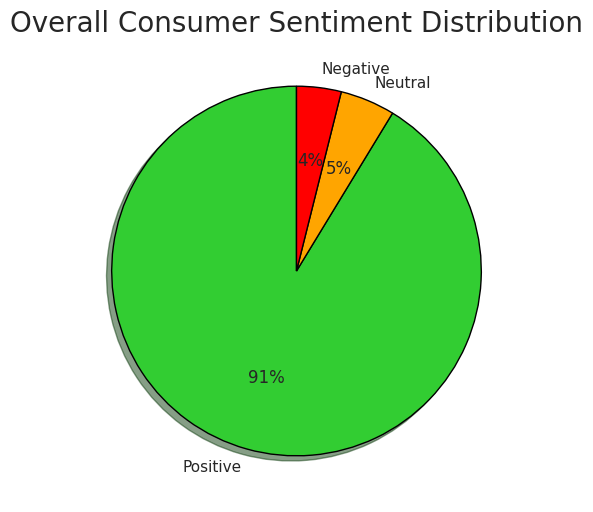

In [ ]:
# Visualize the overall consumer sentiment distribution with a pie chart
consumer_sentiment.plot(kind='pie', autopct='%1.f%%', colors=['limegreen', 'orange', 'red'], figsize=(6,6), shadow=True, wedgeprops={'edgecolor': 'black'}, startangle=90)
plt.title('Overall Consumer Sentiment Distribution', fontsize = 20)
plt.ylabel('')
plt.show()

While the majority of positive consumer reviews for Beats by Dre was 82 out of 100, it also had a moderate neutral sentiment suggesting that some customers felt that it did not quite exceed their expectations, but it was still able to provide them with a satisfactory experience by meeting their needs. There may be room for improvement to increase positive sentiment while also addressing the issues from the ones who had a negative sentiment regarding the product.

## 7. AI-Generated Insights

### 7.1 Using Gemini AI

Gemini AI was utilized to extract deeper insights from consumer reviews and provide a nuanced understanding of customer feedback, helping to identify key themes, sentiment, and comparisons with competing products. The function analyze_reviews() was created to send a subset of reviews along with a prompt to Gemini AI, which then returned a text response based on the input data.

In [ ]:
api_key = "YOUR_API_KEY"

# Function to analyze reviews using Gemini AI
def analyze_reviews(reviews, api_key,prompt_message):
    genai.configure(api_key=api_key)

    model = genai.GenerativeModel(
        model_name="gemini-1.5-flash",
        generation_config={
            "temperature": 1,
            "top_p": 0.95,
            "top_k": 64,
            "max_output_tokens": 8192,
            "response_mime_type": "text/plain",
        },
    )

    chat_session = model.start_chat(history=[])

    prompt = prompt_message + "\n\n".join(reviews)
    response = chat_session.send_message(prompt)
    return response.text

### 7.2 Key Insights



In [ ]:
# Select a subset of reviews

reviews_column_name = 'content'
reviews = df[reviews_column_name].head(100).tolist()

# Prompt 1
prompt_message = "What are the most frequently mentioned keywords in the reviews? are they positive or negative?:"
insights = analyze_reviews(reviews, api_key, prompt_message)
print(insights)

Here's a breakdown of the most frequently mentioned keywords in the reviews and whether they have a positive or negative connotation:

**Positive Keywords:**

* **Sound:**  "Great sound," "amazing sound," "good sound," "sound quality," "phenomenal sound," "crisp sound," "powerful lows," "well-balanced audio" -  These all indicate positive impressions of the headphone's audio quality.
* **Noise Cancellation:**  "Noise canceling," "noise cancellation," "ANC," "blocks out noise," "cancel out external noises," "good noise cancellation" - These phrases highlight the effectiveness of the noise-canceling feature, which is a key selling point for many users.
* **Comfort:** "Comfortable," "snug fit," "soft cushions," "lightweight," "no ear pain," "no discomfort" -  Comfort is consistently praised, suggesting a pleasant listening experience, even for extended periods.
* **Battery Life:** "Battery life," "long battery life," "good battery life," "long charge," "charges fast" -  Users are happy wi

Gemini AI identified frequent positive keywords such as "sound," "quality," "comfort," "battery," and "value." Customers often praised the audio quality, comfort, and long battery life of Beats Studio3. Negative feedback focused on issues like "noise cancellation," "fit," and "build quality." Some users reported that the noise cancellation wasn't as effective as they hoped, and a few had concerns about the durability of the product.

In [ ]:
# Prompt 2
reviews_column_name = 'content'
reviews = df[reviews_column_name].head(100).tolist()

# Send prompts
prompt_message = "Based on the reviews, did the customers compare this product to another? what were their sentiments?:"
insights = analyze_reviews(reviews, api_key, prompt_message)
print(insights)

The reviews compared the Beats Studio 3 Wireless Noise Cancelling Headphones to the following:

* **Sony XM4 and XM5:** Customers found the Sony headphones to be superior in sound quality, noise cancellation, and build quality, especially at the $350 price point.
* **AirPods Max:** Some customers considered the AirPods Max as an alternative, but many felt that the Beats Studio 3 were a good option due to the release of a new generation of AirPods Max.
* **Solo 3:** Some customers compared the Studio 3 to the Solo 3, noting that the Studio 3 had superior noise cancellation and comfort.
* **Bose:** A few customers found the Beats Studio 3 to be comparable to Bose headphones in terms of sound quality.
* **Other Over-Ear Headphones:** Some customers mentioned comparing the Beats Studio 3 to other over-ear headphones in the $350 price range, with varying opinions on their performance.

**Sentiments:**

* **Positive:** Many customers praised the Beats Studio 3 for their sound quality, comfor

Customers compared Beats Studio3 with other high-end headphones like AirPods Max and Sony XM4/XM5. The consensus was that while Beats Studio3 offers good value, especially when on sale, competitors like Sony were preferred for better noise cancellation and sound quality.

In [ ]:
# Prompt 3
reviews_column_name = 'content'
reviews = df[reviews_column_name].head(100).tolist()

# Send prompts
prompt_message = "Based on the reviews, have any of the customers expressed their desire to purchase this product again?:"
insights = analyze_reviews(reviews, api_key, prompt_message)
print(insights)

Based on the reviews, here's what we can glean about customer repeat purchases:

* **Some customers express clear intention to repurchase:**  Multiple customers mention buying a second pair after their first pair lasted for years. 
    * "This is my 2nd pair I still have the first (2 yrs at least)"
    * "Got my first pair for a graduation gift back in 2011 and fell in love. Love these headphones."
* **Some customers imply repurchase due to satisfaction:**  Many customers express strong satisfaction with the headphones, suggesting they'd likely consider buying them again. 
    * "The sound quality on these is amazing gr8 bass"
    * "Love the quality! Almost as good as my Bose"
    * "These are the best investments ever, especially when you’re using public transportation and you need to block all the noise out while you enjoy your travel time"
* **Some customers are ambivalent about repurchase:**  Some customers highlight specific downsides (like build quality issues or noise cancellat

The overall positive sentiment, particularly regarding sound quality and comfort, suggests that many customers might consider buying Beats Studio3 again, especially at a discounted price.

### 7.3 Interpretation


 The negative feedback regarding noise cancellation and build quality indicates potential areas where Beats could improve. Addressing these issues could help Beats better compete with products like Sony.

## 8. Comparative Analysis

### 8.1 Competitor Overview

### Sony WH-1000XM5:
The Sony WH-1000XM5 is positioned as a top-tier, premium wireless noise-canceling headphone, building on the success of its predecessors. Known for industry-leading noise cancellation, exceptional sound quality, and comfortable design, the XM5 targets audiophiles and frequent travelers. Despite its high price, it competes strongly in the market against brands like Bose and Sennheiser.

### INFURTURE H1:
The INFURTURE H1 Active Noise Cancelling Headphones is an exceptional budget-friendly option, offering good noise cancellation and impressive sound quality for under $60. This product provids an immersive listening experience, complemented by up to 40 hours of battery life. Although they may lack the premium features and midrange detail of more expensive models, the INFURTURE H1 stands out for its value, making it an excellent choice for those seeking effective noise isolation and solid performance without a high price tag.

### Edifier WH700NB:
The Edifier WH700NB is a budget-friendly, high-value option in the wireless headphone market with its exceptional battery life and active noise cancellation, making it a good choice for cost-conscious consumers who need reliable, long-lasting headphones. While it lacks some premium features found in higher-end models, the WH700NB competes by delivering solid performance and advanced features like Bluetooth 5.3 and 68 hours of battery life.

### MOVSSOU E7:
Featuring 45mm drivers that deliver deep bass, this headphone is well-suited for bass-heavy genres like hip-hop. It has a comfortable fit with a 30-hour battery life. While the charging time may be slower than some users prefer, the overall value and features makes it a strong contender for those seeking affordable wireless headphones under $50.

### JBL Live 460NC:
This headphone comes with a companion app that allows users to customize their sound with EQ and presets, making them versatile for different listening preferences. With a battery life of up to 30 hours and multi-device pairing, they are convenient for daily use. However, their ANC isn't as effective at reducing bass-heavy noises and some users might find the on-ear fit uncomfortable for extended periods.

### Sennheiser HD 450BT:
The Sennheiser HD 450BT headphone is a more affordable alternative to high-end models like the Sony WH-1000XM3. It's designed for commuters and travelers, offering solid noise cancellation, impressive sound quality, and long battery life. It also has an app which provides an equalizer, Podcast Mode and Firmware updates. While the build quality may feel less premium compared to pricier models, the HD 450BT delivers excellent audio performance with a well-balanced sound profile, making them a strong contender for those seeking high-quality wireless headphones without the hefty price tag.

### soundcore by Anker Q20i:
With active noise cancellation (ANC), a remarkable battery life of up to 60 hours, and solid sound quality, these headphones are an excellent choice for under $100. However, the build quality feels like plastic and the buttons may seem bulky. They also support customizable EQ settings via the Soundcore app, allowing users to fine-tune the audio to their liking.

### Bose QuietComfort:
They are ideal for commuting and traveling, effectively blocking out ambient noise like bus engines. This latest model introduces a bass-heavy sound profile and an in-line mic for wired calls, enhancing versatility. With over 26 hours of battery life, they provide long-lasting use, though not as extended as competitors like the Sony WH-1000XM4.

### RUNOLIM Active Noise Cancelling Headphones:
The RUNOLIM noise-canceling headphones are designed for those seeking advanced active noise cancellation (ANC) at an affordable price for below $60. The headphones offer impressive battery life, with up to 70 hours of playtime in standard mode and 45 hours with ANC activated. They also feature Hi-Fi audio and a built-in HD microphone. However, users have expressed issues with its bluetooth connection over time.

### 8.2 Comparison of Sentiments


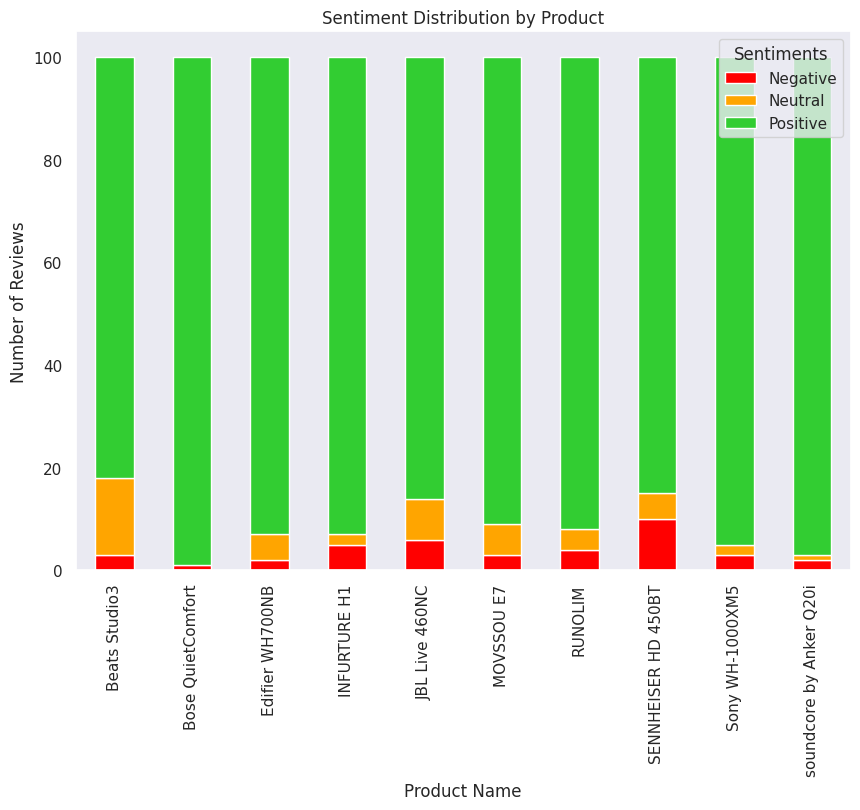

In [ ]:
# Convert the consumer_sentiments Series to a DataFrame
consumer_sentiments_df = consumer_sentiments.unstack()
consumer_sentiments_df.plot(kind='bar', stacked=True, figsize=(10, 7), color=['red', 'orange', 'limegreen'])

sns.set(style='dark')
plt.title('Sentiment Distribution by Product')
plt.xlabel('Product Name')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=90)
plt.legend(title='Sentiments')
plt.show()

Beats Studio3's sentiment distribution is similar to that of Bose QuietComfort and Sony WH-1000XM5 with a high level of positive feedback and minimal negative sentiment, placing it in a favorable position among its competitors. However, RUNOLIM and Sennheiser HD 450BT have a slightly higher proportion of negative reviews, indicating some areas of customer dissatisfaction.

### 8.3 SWOT Analysis

### Strengths:

*   Sound quality
*   Powerful bass
* Comfortable design
* Long battery life
* Seamless Apple Integration
* Offers great value when purchased at a discount

### Weaknesses:

* Noise cancellation limitations
* Build quality concerns
* Micro USB charging
* High retail price

### Opportunities:

* Switch to USB-C
* Improve noise cancellation

### Threats:

* High price point
* Preference for advanced features

## 9. Strategic Recommendations

### 9.1 Product Improvements


1. Improve Active Noise Cancellation (ANC)

  While the Studio3 offers some noise cancellation, it's not as effective as more specialized models from Sony or Bose. Upgrading or improving its ANC could involve developing advanced algorithms that better distinguish between ambient noises and conversational sounds, making the headphones more effective in a wider range of environments.

2. Switch to USB-C Charging

  A few customers express disappointment with the Micro USB charging port, preferring the more modern USB-C standard. USB-C offers faster charging, greater durability and is becoming the standard for most modern electronic devices, making it a necessary upgrade to meet consumer expectations.

3. Adjustable earcup size

  Some users with larger ears found the earcups too small. Offering different earcup sizes or a more adjustable design could accommodate a wider range of head shapes and sizes.

4. Better headband padding

  Many users found the headband lacked cushioning, leading to discomfort after extended wear. Adding more padding could significantly improve comfort. Beats by Dre could also introduce memory foam padding that molds to the user's ears over time, reducing pressure points and enhancing comfort during long listening sessions.

5. Improved folding mechanism

  The current folding mechanism can cause the earcups to be squished against the headband, potentially leading to damage or discomfort. Address the concerns about the durability of the folding mechanism to reduce the likelihood of wear and tear over time.


### 9.2 Marketing Strategies


While the noise cancellation is not considered top-tier, many reviewers praise the sound quality, particularly bass, and comfortable fit. Consumers find that they get a better value when they purchase the product while it's on sale. Beats by Dre could plan regular promotions or offer discounts like student discounts that can attract budget-conscious consumers while maintaining the brand's premium image.

### 9.3 Future Research

Price sensitivity research and a demographic breakdown of the collected detailed demographic data could help further enhance the analysis by analyzing how price changes or promotions affects sales compared to its competitors and understanding its primary users to better help tailor marketing strategies.

## 10. Conclusion


The results of this analysis for Beats by Dre emphasizes the need for continuous product improvement, especially in noise cancellation technology, build quality, and keeping up with current technological advancements like USB-C charging. The Beats Studio3 headphones are popular, but only truly competitive when purchased on sale. Consumers are sensitive to the value proposition and expect strong performance for the price. Its competitors based on the sentiment analysis would be Sony, Bose and soundcore who all had comparatively higher reviews which made Beats by Dre fall slightly behind. However, it does well in avoiding disatisfaction among its consumers with its low negative reviews compared to the other products. Beats by Dre could focus on turning the moderate reviews to positive through refining its features and addressing any issues.

## 11. References


Osaji, Faith. “The Wireless Generation” Beats by Dre Extern, 14 Aug. 2024


Helm, Burt. “How Dr. Dre's Headphones Company Became a Billion-Dollar Business.” Inc.com, Inc., 23 Apr. 2014, www.inc.com/audacious-companies/burt-helm/beats.html.


Nast, Condé. “Sony's All-New Flagship Noise-Cancelers Are Still the Best.” WIRED, 12 May 2022, www.wired.com/review/review-sony-wh-1000xm5/.


"INFURTURE H1 Active Noise Cancelling Headphones: A Clear and Crisp Listening Experience for an Unbeatable Price ”: Findearphone.com, 2023, www.findearphone.com/post/detail/306/.


Nieto, Álvaro. “Edifier WH700NB: Affordable Headphones with More than 60 Hours of Use.” Tech Week, Tech Week, 25 Dec. 2023, www.techweekmag.com/reviews/headphones/edifier-wh700nb-review/.


Reviews, Jimmy. “Should You Buy the MOVSSOU E7 Active Noise Cancelling Headphones? An Honest Review.” Medium, Medium, 28 Apr. 2024, www.medium.com/@JimmyReviews/should-you-buy-the-movssou-e7-active-noise-cancelling-headphones-an-honest-review-92ec0825ee20.


"JBL Live 460NC Wireless Review.” RTINGS.com, www.rtings.com/headphones/reviews/jbl/live-460nc-wireless.

Tambini, Olivia. “Sennheiser HD 450BT.” TechRadar, 2 June 2021, www.techradar.com/reviews/sennheiser-hd-450bt.

Daniel. “Anker Soundcore Q20i Review: The Updated Version of the Q20 - Headphone Speak.” Headphone Speak, 16 Oct. 2023, headphonespeak.com/anker-soundcore-q20i-review-the-updated-version-of-the-q20/.

“Bose QuietComfort Headphones Wireless Review.” RTINGS.com, www.rtings.com/headphones/reviews/bose/quietcomfort-headphones-wireless.

